In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix


In [9]:
from sklearn.model_selection import GridSearchCV


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import GridSearchCV 

In [11]:
recipes = pd.read_csv('C:/Users/user/Downloads/recipes_muffins_cupcakes_scones.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [12]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           25 non-null     object
 1   Flour          25 non-null     int64 
 2   Milk           25 non-null     int64 
 3   Sugar          25 non-null     int64 
 4   Butter         25 non-null     int64 
 5   Egg            25 non-null     int64 
 6   Baking Powder  25 non-null     int64 
 7   Vanilla        25 non-null     int64 
 8   Salt           25 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ KB


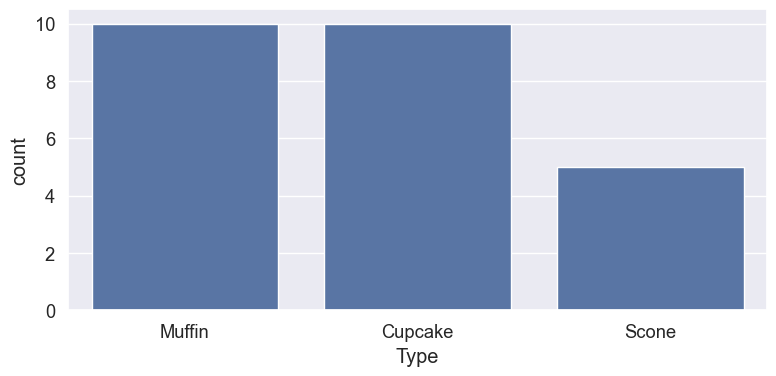

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x = recipes['Type'])
plt.tight_layout()


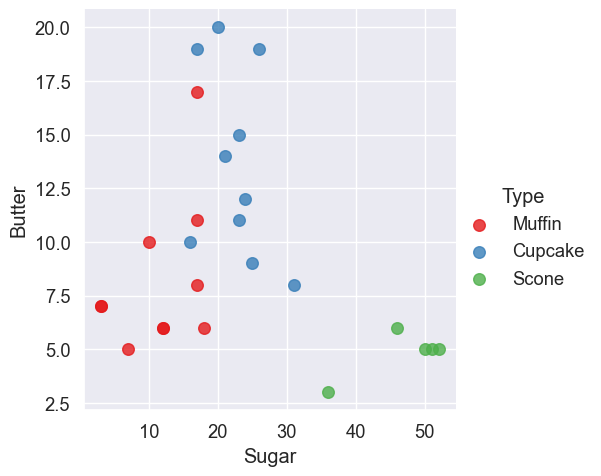

In [14]:
sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})


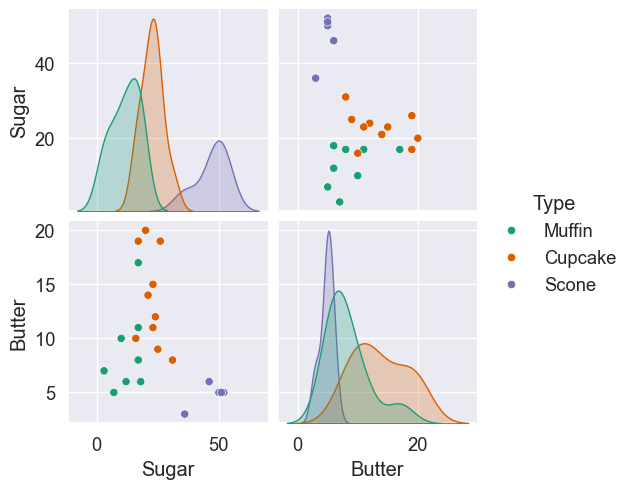

In [15]:
sns.pairplot(recipes, vars=['Sugar', 'Butter'], hue='Type', palette='Dark2')

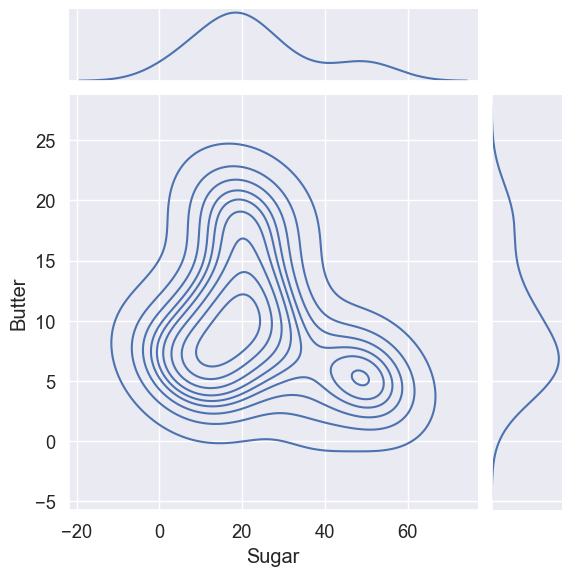

In [16]:
sns.jointplot(x='Sugar', y='Butter', data=recipes, kind='kde')
plt.show()


In [17]:
X=recipes.drop('Type', axis=1)
y=recipes['Type']

In [18]:
kernels=['polynominal','RBF','Sigmoid','Linear']

In [19]:
def getClassifier(ktype):
     if ktype == 0:
           return SVC(kernel='poly', degree=8, gamma="auto")
     elif ktype == 1:
           return SVC(kernel='rbf', gamma="auto")
     elif ktype == 2:
           return SVC(kernel='sigmoid', gamma="auto")
     elif ktype == 3:
           return SVC(kernel='linear', gamma="auto")


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def getClassifier(index):
    # 根據 index 回傳不同核函式的 SVC
    return SVC(kernel=kernels[index])

for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    svcclassifier = getClassifier(i)
    
    svcclassifier.fit(X_train, y_train)
    
    y_pred = svcclassifier.predict(X_test)
    
    print(f"Evaluation: {kernels[i]} kernel")
    print(classification_report(y_test, y_pred))


Evaluation: linear kernel
              precision    recall  f1-score   support

      Muffin       1.00      1.00      1.00         3
       Scone       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Evaluation: poly kernel
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         3
      Muffin       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Evaluation: rbf kernel
              precision    recall  f1-score   support

     Cupcake       0.67      1.00      0.80         2
      Muffin       1.00      0.50      0.67         2
       Scone       1.00      1.00      1.00         1

    accuracy                           0.80         5
 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
for i in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    svcclassifier = getClassifier(i)
    svcclassifier.fit(X_train, y_train)
    y_pred = svcclassifier.predict(X_test)
    
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test, y_pred))


Evaluation: linear kernel
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         3
      Muffin       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Evaluation: poly kernel
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         3
      Muffin       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Evaluation: rbf kernel
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.00      1.00         2
       Scone       1.00      1.00      1.00         1

    accuracy                           1.00         5
 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)


SVC(gamma='auto')

In [23]:
svm_classifier.score(X_train, y_train)


1.0

In [24]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

In [25]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [26]:
print(grid.best_estimator_)


SVC(C=10, gamma=0.001)


In [27]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))


[[2 0 0]
 [0 2 0]
 [0 0 1]]
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.00      1.00         2
       Scone       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [1]:
import os
print(os.getcwd())  # 顯示當前工作目錄

C:\Users\user
